# DATA2001 Assignment 2
## Unstructured Data Analysis
### Jamie Katsamatsas s4674720
### <date>

# Task 1 - Data Preparation
Read the dataset using the “pandas” library. Columns ‘Id’, ‘Score’ and ‘Text’
are the only columns that should be used, and other columns must be ignored. To perform
sentiment analysis, annotate the review dataset using already provided score column. Create
new column ‘Label’. Assign ‘pos’ – positive for the product ratings 4 and 5. Assign ‘neg’ –
negative for the product ratings 1 and 2. Product rating with score 3 should be ignored and
dropped from the dataset. After annotating, produce the summary of the dataset. How many
positive and negative reviews are present in the data. Print your summary.

Column Descriptions
- Id – review id
- ProductId – id of the product
- UserId – id of the user
- ProfileName – name of the user
- HelpfulnessNumerator – fraction of users who found the review helpful (numerator part)
- HelpfulnessDenominator – fraction of users who found the review helpful (denominator part)
- Score – rating of the product
- Time – time of the review (in unix time)
- Summary – review summary
- Text – text of the review

In [1]:
import pandas as pd
from matplotlib import pyplot as plt

In [2]:
# Load data
data = pd.read_csv("dataset.csv")
data.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
1,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...
2,10,B00171APVA,A21BT40VZCCYT4,Carol A. Reed,0,0,5,1351209600,Healthy Dog Food,This is a very healthy dog food. Good for thei...
3,17,B001GVISJM,A3KLWF6WQ5BNYO,Erica Neathery,0,0,2,1348099200,poor taste,I love eating them and they are good for watch...
4,39,B001EO5QW8,A2GHZ2UTV2B0CD,JERRY REITH,0,0,4,1350777600,GOOD WAY TO START THE DAY....,I WAS VISITING MY FRIEND NATE THE OTHER MORNIN...


In [3]:
# inspect data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30365 entries, 0 to 30364
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Id                      30365 non-null  int64 
 1   ProductId               30365 non-null  object
 2   UserId                  30365 non-null  object
 3   ProfileName             30363 non-null  object
 4   HelpfulnessNumerator    30365 non-null  int64 
 5   HelpfulnessDenominator  30365 non-null  int64 
 6   Score                   30365 non-null  int64 
 7   Time                    30365 non-null  int64 
 8   Summary                 30365 non-null  object
 9   Text                    30365 non-null  object
dtypes: int64(5), object(5)
memory usage: 2.3+ MB


In [4]:
# drop all columns besides 'id', 'score', 'text'
data.drop(data.columns.difference(['Id', 'Score', 'Text']), axis=1, inplace=True)
data.head(10)

,Id,Score,Text
0,2,1,Product arrived labeled as Jumbo Salted Peanut...
1,5,5,Great taffy at a great price. There was a wid...
2,10,5,This is a very healthy dog food. Good for thei...
3,17,2,I love eating them and they are good for watch...
4,39,4,I WAS VISITING MY FRIEND NATE THE OTHER MORNIN...
5,53,4,This wasn't in stock the last time I looked. I...
6,56,5,We roast these in a large cast iron pan on the...
7,77,5,These looked like a perfect snack to through i...
8,78,5,These taste really good. I have been purchasin...
9,79,3,"The taste was great, but the berries had melte..."


In [5]:
# drop rows where "Score" == 3
# https://www.statology.org/pandas-drop-rows-with-value/
data = data[data["Score"] != 3]
data.head(10)

,Id,Score,Text
0,2,1,Product arrived labeled as Jumbo Salted Peanut...
1,5,5,Great taffy at a great price. There was a wid...
2,10,5,This is a very healthy dog food. Good for thei...
3,17,2,I love eating them and they are good for watch...
4,39,4,I WAS VISITING MY FRIEND NATE THE OTHER MORNIN...
5,53,4,This wasn't in stock the last time I looked. I...
6,56,5,We roast these in a large cast iron pan on the...
7,77,5,These looked like a perfect snack to through i...
8,78,5,These taste really good. I have been purchasin...
10,90,5,Great food! I love the idea of one food for al...


In [6]:
data['Score'].value_counts()

5    19354
4     3874
1     3162
2     1664
Name: Score, dtype: int64

In [7]:
# Create label column
# https://towardsdatascience.com/create-new-column-based-on-other-columns-pandas-5586d87de73d
def sentiment(row):
    if row["Score"] in [4, 5]:
        return 'pos'
    elif row["Score"] in [1, 2]:
        return 'neg'

In [8]:
data['Label'] = data.apply(lambda row: sentiment(row), axis=1)

In [9]:
data.head()

,Id,Score,Text,Label
0,2,1,Product arrived labeled as Jumbo Salted Peanut...,neg
1,5,5,Great taffy at a great price. There was a wid...,pos
2,10,5,This is a very healthy dog food. Good for thei...,pos
3,17,2,I love eating them and they are good for watch...,neg
4,39,4,I WAS VISITING MY FRIEND NATE THE OTHER MORNIN...,pos


In [10]:
data['Label'].value_counts()

pos    23228
neg     4826
Name: Label, dtype: int64

<AxesSubplot:title={'center':'Distribution of Sentiment'}, ylabel='Label'>

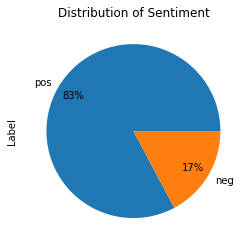

In [11]:
sentiment_distribution = data['Label'].value_counts(dropna=False, normalize=True)
sentiment_distribution.plot.pie(autopct="%1.0f%%", pctdistance=0.8, radius=1, title="Distribution of Sentiment")

In the dataset there are 23228 positive reviews and 4826 negative reviews. Which results in 83% positive and 17% negative indicating that the dataset is imbalanced.

# Task 2 - Data Cleaning
Write the necessary scripts to clean the text in the review dataset and explain
the steps along with the justification in less than 4 lines.

# Task 3 - Logistic Regression Model
Build a logistic regression text classifier to categorise whether review has positive or negative
sentiment. 70% of the reviews should be used for training and the remaining 30% for the
testing. List the steps taken in your own words to build the model in less than 4 lines.

# Task 4 - Evaluate Model
Evaluate the model built in the previous step and compare it with a baseline model that
assigns positive label to all test samples. A) Report accuracy and only for the negative class
report precision, recall, f1 score; and B) show a confusion matrix for both the baseline and the
logistic regression models. Explain the cause of difference between the accuracy and the f1
score of the negative class for the baseline model.

Result should be written in below format: (CHECK PDF SPEC SHEET)

    A)
    Baseline: {‘accuracy’:0.0, ‘precision’:0.0, ’recall’:0.0, ‘f1-score’:0.0}
    Logisticregression: {‘accuracy’:0.0, ‘precision’:0.0, ’recall’:0.0, ‘f1-score’:0.0}
    B)
    Confusion matrix for baseline model:

# Task 5 - Prediction of Predict Database
Use the better performing model (hopefully your logistic regression model) to predict the sentiment for the reviews provided in the predict dataset (download ‘predictdata.csv’ from the blackboard). Report the results in a dataframe format with columns ‘Id’, ‘Text’ and ‘Model Prediction’.

# Task 6 - Frequent Words
What are the most frequent words in the review dataset (use a world cloud to show this, remove stop words) and show which words play a significant role in classify whether the review is positive or negative.

# Task 7 - Classification with Unabalnced Data
Write in three lines with your own words about classification with unbalanced data. What is the issue with unbalanced data and how you could handle it in a better way (you don’t need to implement your solution)? Provide the issue with imbalanced classification and your suggestion in less than 4 sentences that reader can understand clearly using research from the internet resources.